# Sales price study Notebook

## Objectives.

- This are the answers for the business requirement 1.
    - My niece is interested in discovering how the house attributes correlate with the sale price of the houses. 
    - Therefore, my niece is expecting a data visualization of the correlated variables against the sale price. 

- Load and inspect the data prepared during data collection (01_data_collection).
- Data Exploration.
- EDA on selected variables.
- Conclusion and next steps.

## Inputs:

- inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv

Additional Comments: 

- This notebook has been written with the help from my colleagues, the walkthrough project and the data cleaning lesson provided within the course.
- This notebook is designed to allow us to explore the data using the CRISP-DM data understanding methodology. 

___


## Changing the working directory:

Change the working directory from its current folder to its parent folder: 

- Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analysis/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
 
    - os.path.dirname() gets the parent directory.
    - os.chir() defines the new current directory. 

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory, congrats!")

You set a new current directory, congrats!


The following command will confirm the new current directory: 

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/PP5-Predictive-Analysis'

___

Now that this is done, we will need to import Packages:

## Import Packages:

In [4]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas_profiling import ProfileReport

Now that we have imported the pandas packages we can load the houses price records previously prepared: 

In [5]:
df = pd.read_csv(f"inputs/datasets/raw/house-price-20211124T154130Z-001/house-price/house_prices_records.csv")
print(df.shape)
df.head()

(1460, 24)


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


## Data Exploration:

- We have the data, now we have to explore the dataset, by checking variable types and distribution, missing levels and what value these variables may add in the context of the first business requirement. 

In [6]:
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

___


## Correlation Study

Asses correlation levels across numerical variables using 'Spearman' and 'Pearson' methods.

- We will exclude the first item returned as this will be the correlation between SalePrice (Pearson) and SalePrice (Spearman).
- The ideal is to be able to fetch only the most relevant correlations. (We will correlate 10)

### Pearson Method:

- Using the 'Pearson' method to measure the linear relationship between two features.

In [7]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

## Spearman Method:

- Using the 'Spearman' method to measure the linear relationship between two features.

In [8]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
YearBuilt       0.652682
GarageArea      0.649379
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
OpenPorchSF     0.477561
LotArea         0.456461
Name: SalePrice, dtype: float64

After conducting the correlation study with the 2 methods (Pearson & Spearman) we got to the conclusion that there are positively strong levels of correlation. (This level of correlation is between Sales Price and at least 5 variables)

### Investigation:

- We will take the top 5 variables returned for each method, and transform them into a list by concatenate the two lists.
- After this we will be able to visualize a unique correlation from both methods combined. 

In [9]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'1stFlrSF',
 'GarageArea',
 'GrLivArea',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

- This results 6 variables (1stFlrSF, GarageArea, GrLivArea, OverallQual, TotalBsmtSF, YearBuilt) that correlate to Sale Price.
- These 6 variables will be tested on strength to predicting the Sale Price.

In [10]:
corr_var_list = list(set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list()))
corr_var_list

['TotalBsmtSF',
 'GrLivArea',
 'GarageArea',
 'YearBuilt',
 'OverallQual',
 '1stFlrSF']

___

## EDA on the correlated variable list.

- Filter the house price dataset on only the correlated variable list and include the sale price.

In [12]:
df_eda = df.filter(corr_var_list + ['SalePrice'])
print(df_eda.shape)
df_eda.head(7)

(1460, 7)


,TotalBsmtSF,GrLivArea,GarageArea,YearBuilt,OverallQual,1stFlrSF,SalePrice
0,856,1710,548,2003,7,856,208500
1,1262,1262,460,1976,6,1262,181500
2,920,1786,608,2001,7,920,223500
3,756,1717,642,1915,7,961,140000
4,1145,2198,836,2000,8,1145,250000
5,796,1362,480,1993,5,796,143000
6,1686,1694,636,2004,8,1694,307000


### Visualize variable correlation to Sale Price:

- Plot the distribution: 



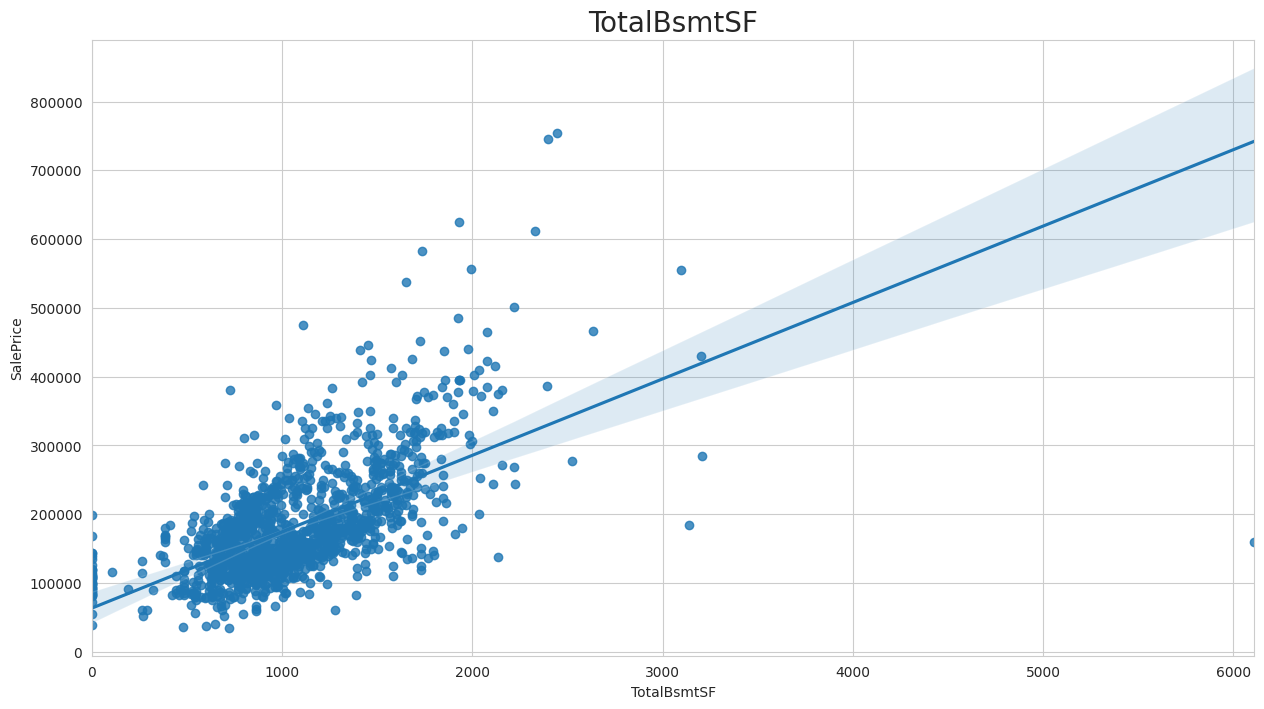

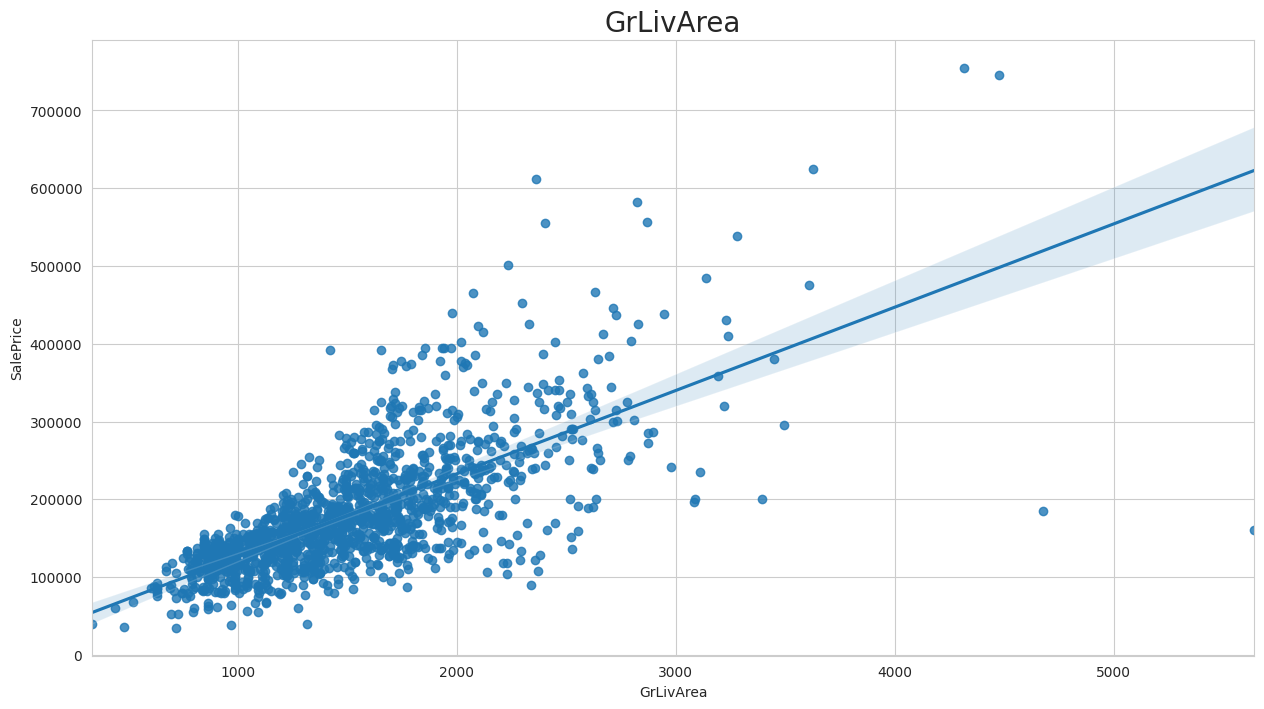

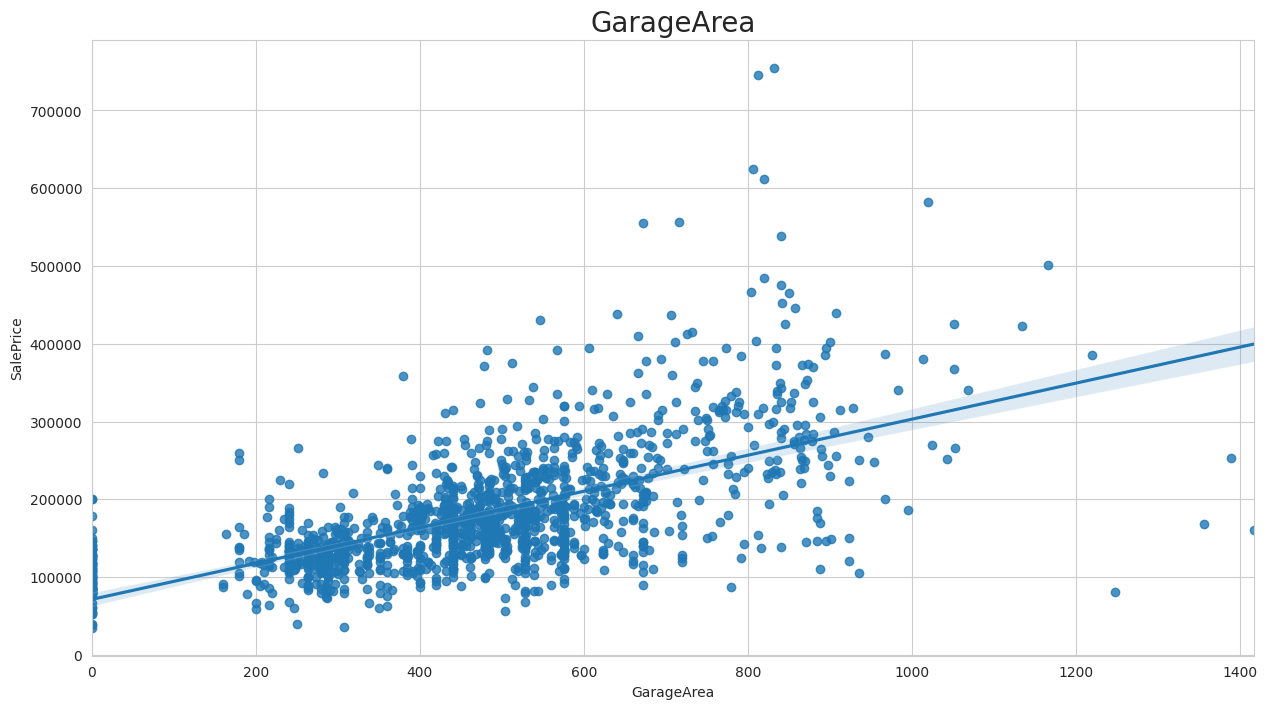

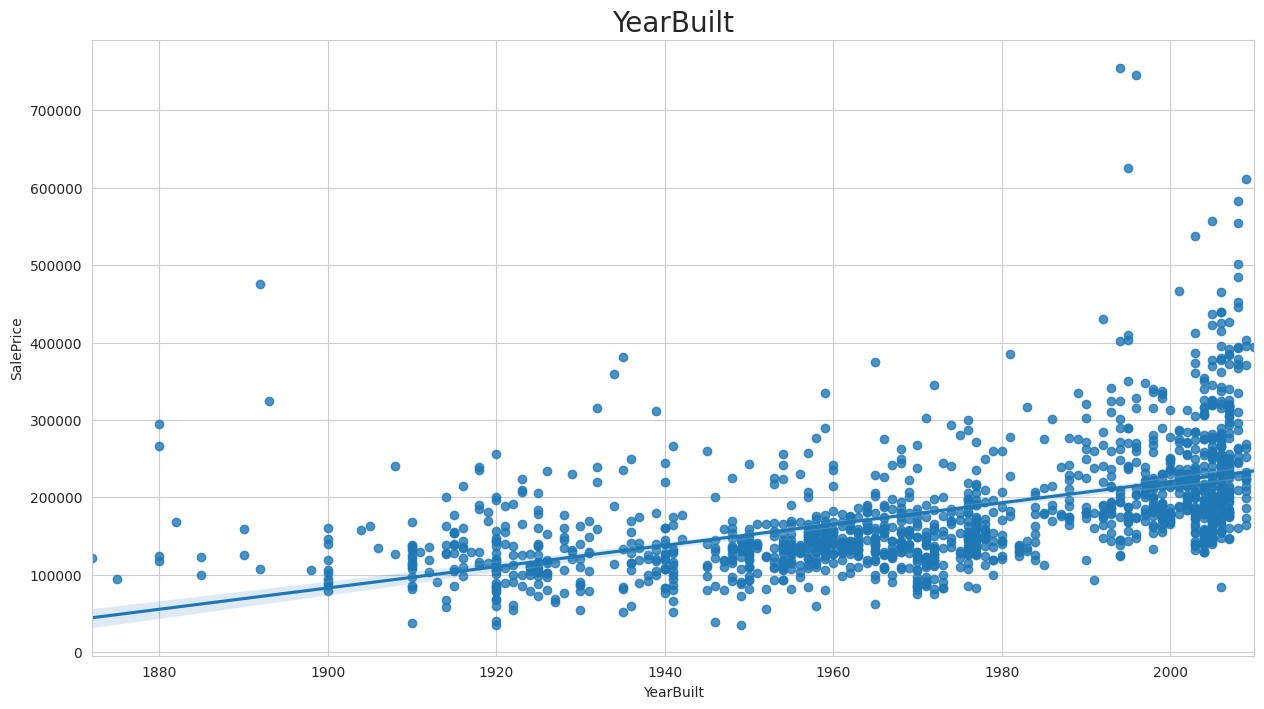

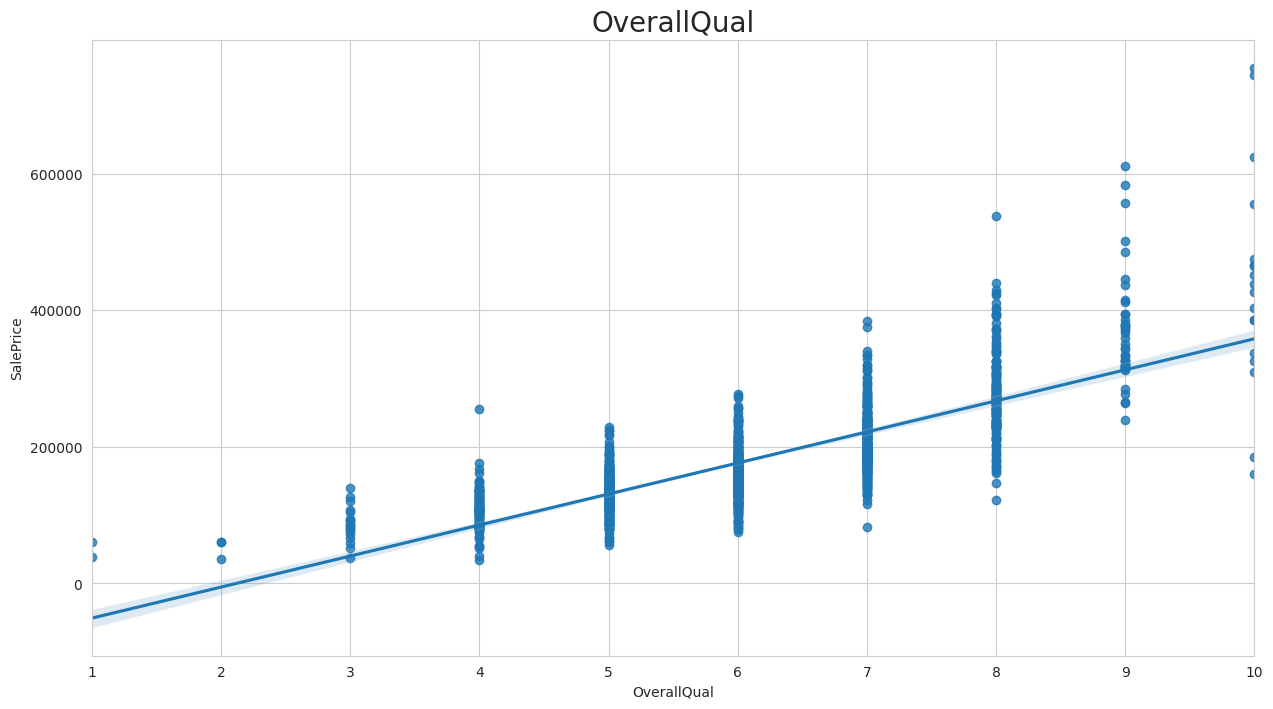

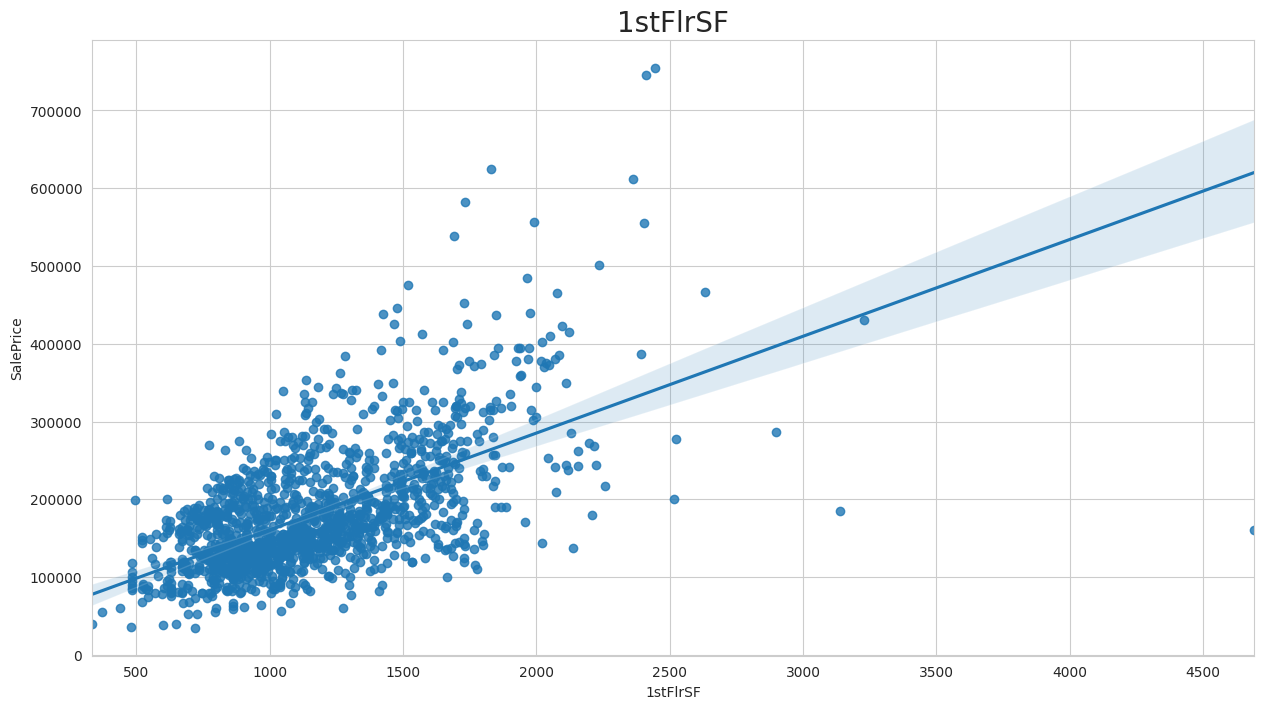

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

def plot_numerical(df, col, target_var):
  plt.figure(figsize=(15, 8))
  sns.regplot(data=df, x=col, y=target_var)  
  plt.title(f"{col}", fontsize=20)
  plt.show()


target_var = 'SalePrice'
for col in corr_var_list:
  plot_numerical(df_eda, col, target_var)
  print("\n\n")

___

## Conclusion and the next steps:

**The correlations and plots interpretation converge.**

- The following are the variables isolated in the correlation study:
    - 1stFlrSF: First Floor square feet.
    - GarageArea: Size of the garage in square feet.
    - GrLivArea: Above grade living area square feet.
    - OverallQual: Rates the overall material and finish of the house when constructed / refurbished.
    - YearBuilt: Original construction date. (1972 to 2010).
    - TotalBsmtSF: Total square feet of basement area.

- Following the above analyses, we consider that the important elements playing a very important role in the house pricing are the following:
        - Ground floor living area,
        - Basement area,
        - Garage area.
- In addition other important factor in house pricing is the year that the house has been built and the quality of the materials used in building or refurbishing the house.

- The plots shows that the variables, isolated in the correlation study, do indeed have a strong correlation and possibly a strong predictive power of the Sale Price for these houses. 

- Our next step will be data cleaning. Let's go! :)


*Please refer to the readme.md file to be able to understand better the parameters and the naming used within this project.
Please keep in mind that this prices represent every pice of each house until 2010*.

*The house prices have been increasing lately due to the high interest in mortgages, inflation (Resulting in a higher price of materials) and many other factors. This project is mostly fictional with a public dataset provided by Code Institute, please do not take a financial advice from this project. 😃*



___